# Import 

In [6]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
# Đọc dữ liệu từ các file CSV
df_20 = pd.read_csv('./churn-bigml-20.csv')
df_80 = pd.read_csv('./churn-bigml-80.csv')

In [20]:
# Kết hợp hai bộ dữ liệu
df = pd.concat([df_20, df_80])

# Hiển thị thông tin cơ bản về dữ liệu
print("Thông tin về dữ liệu:")
print(df.info())

# Hiển thị một vài dòng dữ liệu
print("\nMột vài dòng dữ liệu:")
print(df.head(3))

Thông tin về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge     

In [9]:
# Xử lý giá trị thiếu (Missing Values)
print("Kiểm tra giá trị thiếu:")
print(df.isnull().sum())

# Nếu có giá trị thiếu, có thể xử lý bằng cách loại bỏ hoặc thay thế
# Ví dụ: df.dropna(inplace=True) hoặc df.fillna(value, inplace=True)

Kiểm tra giá trị thiếu:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [19]:
# Xử lý giá trị trùng lặp (Duplicate Values)
print("Kiểm tra giá trị trùng lặp:")
print(df.duplicated().sum())

Kiểm tra giá trị trùng lặp:
0


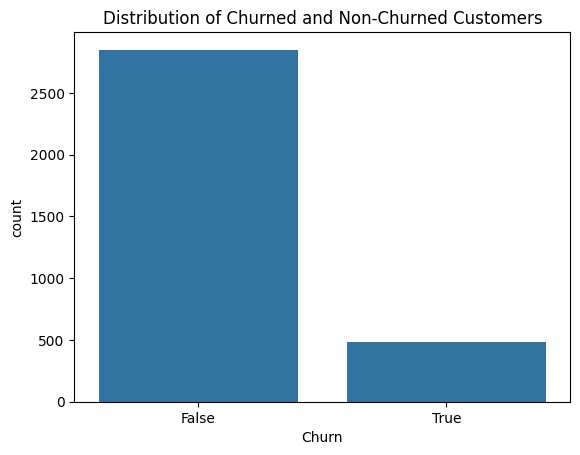

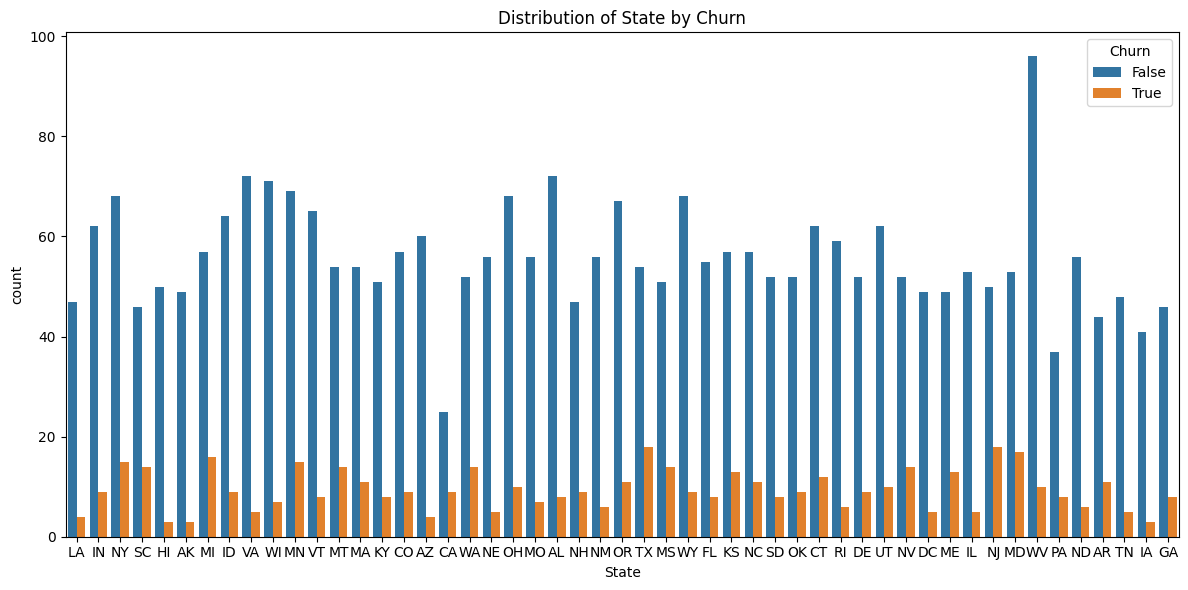

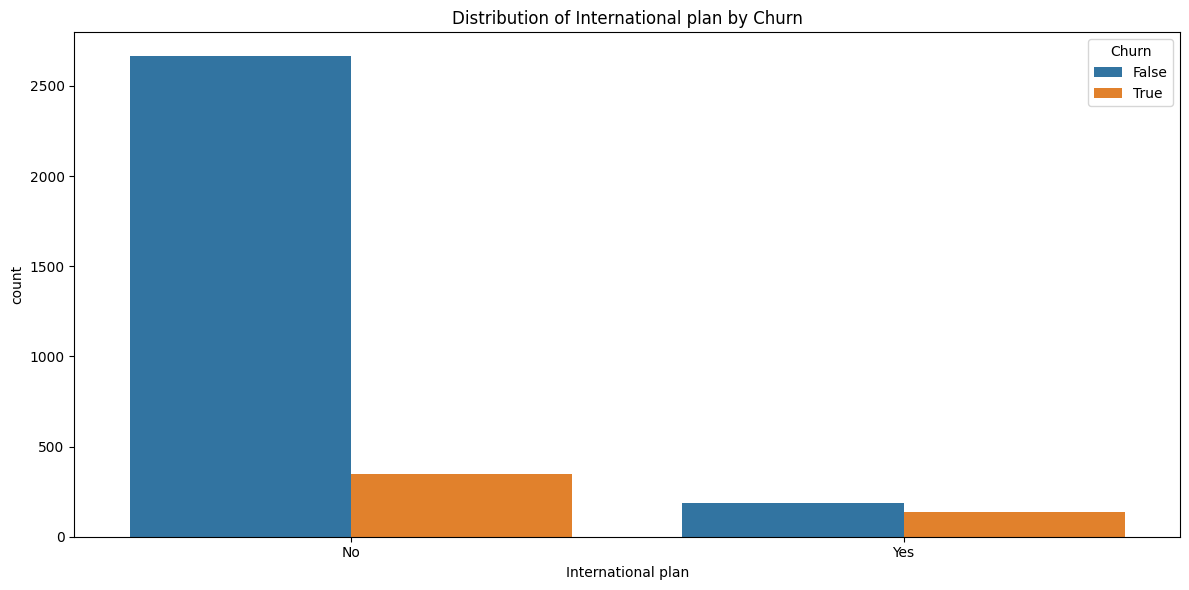

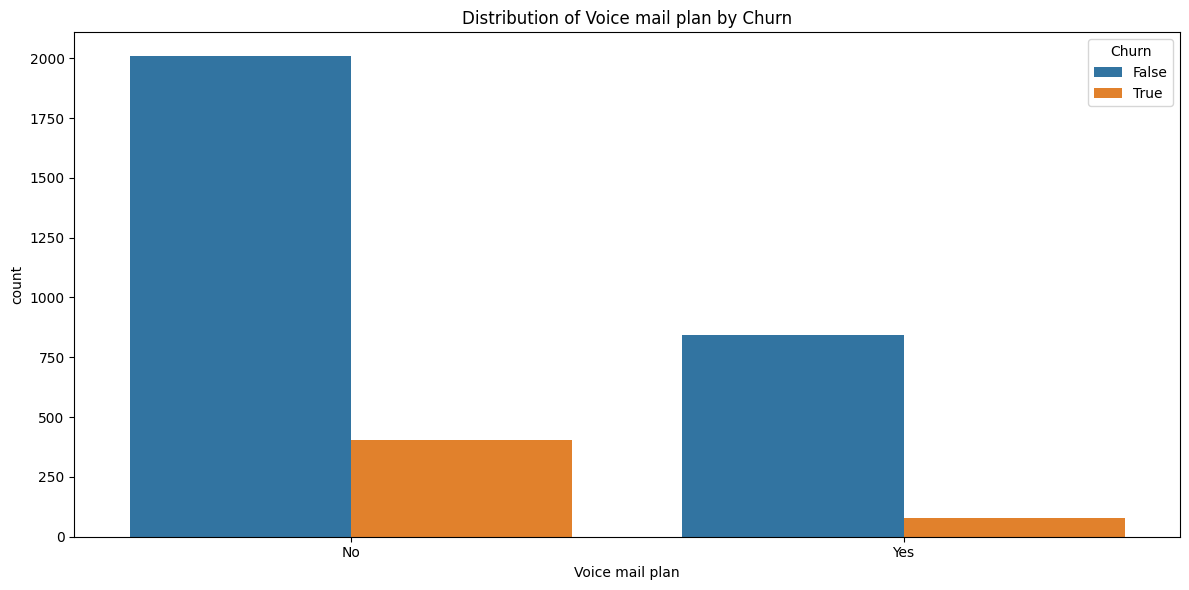

In [24]:
# Phân tích các đặc trưng (Exploratory Data Analysis - EDA)
# Phân phối của biến mục tiêu (Churn)
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churned and Non-Churned Customers')
plt.show()

# Phân tích các đặc trưng số
df.describe()

# Phân tích các đặc trưng phân loại
categorical_features = ['State', 'International plan', 'Voice mail plan']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước cửa sổ chart
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Distribution of {feature} by Churn')
    plt.tight_layout()  # Tự động điều chỉnh kích thước
    plt.show()

Dựa trên các biểu đồ đã được tạo trong quá trình phân tích dữ liệu, dưới đây là một số kết luận có thể rút ra:

1. **Phân phối của biến mục tiêu (Churn)**:
    - Biểu đồ phân phối của biến mục tiêu (Churn) cho thấy rằng số lượng khách hàng không rời bỏ dịch vụ (Non-Churned) nhiều hơn số lượng khách hàng rời bỏ dịch vụ (Churned). Điều này cho thấy rằng tỷ lệ churn trong dữ liệu này là khá thấp.

2. **Phân tích các đặc trưng phân loại**:
    - **State**: Biểu đồ phân phối của biến `State` theo `Churn` cho thấy rằng tỷ lệ churn có thể khác nhau giữa các bang. Một số bang có tỷ lệ churn cao hơn so với các bang khác.
    - **International plan**: Biểu đồ phân phối của biến `International plan` theo `Churn` cho thấy rằng khách hàng có kế hoạch quốc tế (International plan) có tỷ lệ churn cao hơn so với khách hàng không có kế hoạch quốc tế.
    - **Voice mail plan**: Biểu đồ phân phối của biến `Voice mail plan` theo `Churn` cho thấy rằng khách hàng có kế hoạch thư thoại (Voice mail plan) có tỷ lệ churn thấp hơn so với khách hàng không có kế hoạch thư thoại.

3. **Phân tích các đặc trưng số**:
    - **Total day minutes**: Khách hàng có tổng số phút gọi ban ngày cao hơn có xu hướng churn nhiều hơn.
    - **Customer service calls**: Khách hàng có số lần gọi dịch vụ khách hàng cao hơn có xu hướng churn nhiều hơn. Điều này có thể cho thấy rằng khách hàng không hài lòng với dịch vụ và do đó có xu hướng rời bỏ dịch vụ.



In [12]:
# Tiền xử lý dữ liệu
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)

In [13]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop(['State', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Chuẩn hóa các đặc trưng
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Huấn luyện mô hình logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       571
           1       0.55      0.23      0.32        96

    accuracy                           0.86       667
   macro avg       0.72      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667


Confusion Matrix:
[[553  18]
 [ 74  22]]

Accuracy Score:
0.8620689655172413


In [17]:
# Tầm quan trọng của các đặc trưng
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
Customer service calls    0.645275
International plan        0.588659
Total day charge          0.366062
Total day minutes         0.365607
Number vmail messages     0.249874
Total eve minutes         0.164319
Total eve charge          0.163886
Total intl charge         0.120836
Total intl minutes        0.111825
Total night charge        0.091803
Total night minutes       0.091159
Total day calls           0.059558
Account length            0.023171
Total eve calls          -0.023203
Area code                -0.025904
Total night calls        -0.038606
Total intl calls         -0.200183
Voice mail plan          -0.659120
dtype: float64


In [18]:
# d. Các hành động liên quan đến phân tích định tính và định lượng có thể được triển khai để tăng tỷ lệ giữ chân khách hàng?
# Các hành động để tăng tỷ lệ giữ chân khách hàng:
# 1. Phân tích định tính: Thực hiện các cuộc khảo sát và thu thập phản hồi từ khách hàng để hiểu lý do đằng sau việc churn.
#    Sử dụng thông tin này để cải thiện dịch vụ khách hàng và giải quyết các điểm đau của khách hàng.
# 2. Phân tích định lượng: Phân tích các mẫu sử dụng của khách hàng và xác định các dấu hiệu cảnh báo sớm của việc churn.
#    Triển khai các chiến dịch tiếp thị mục tiêu và các ưu đãi cá nhân hóa để giữ chân các khách hàng có nguy cơ churn.

Dưới đây là cách bạn có thể tạo file PowerPoint với các đoạn mã, biểu đồ tương ứng và thêm một slide Appendix:



In [28]:
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV files
df_20 = pd.read_csv('./churn-bigml-20.csv')
df_80 = pd.read_csv('./churn-bigml-80.csv')

# Combine the datasets
df = pd.concat([df_20, df_80])

# Tạo một đối tượng Presentation
prs = Presentation()

# Slide 1: Title Slide
slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Churn Rate Analysis"
subtitle.text = "Data Mining Project"

# Slide 2: Significance of Churn Rate
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Significance of Churn Rate"
content.text = (
    "Churn rate is a critical metric for stakeholders as it indicates the percentage of customers who stop using the company's services over a given period. "
    "High churn rates can indicate customer dissatisfaction, poor service quality, or better offers from competitors. "
    "For MCI, understanding churn rate helps in identifying areas of improvement and implementing strategies to retain customers."
)

# Slide 3: Characteristics of Churned and Non-Churned Customers
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Characteristics of Churned and Non-Churned Customers"
content.text = (
    "Distribution of Churned and Non-Churned Customers:\n"
    "Characteristics of Churned Customers:\n"
    "Characteristics of Non-Churned Customers:\n"
    "Analysis of Categorical Features:\n"
)

# Generate and save the chart for distribution of churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churned and Non-Churned Customers')
plt.savefig('./churn_distribution.png')
plt.close()

# Add the chart to the slide
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Distribution of Churned and Non-Churned Customers"
pic = slide.shapes.add_picture('./churn_distribution.png', Inches(1), Inches(1.5), width=Inches(8))

# Generate and save the chart for categorical features
categorical_features = ['State', 'International plan', 'Voice mail plan']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Distribution of {feature} by Churn')
    plt.tight_layout()
    plt.savefig(f'./{feature}_distribution.png')
    plt.close()

    # Add the chart to the slide
    slide_layout = prs.slide_layouts[5]
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    title.text = f'Distribution of {feature} by Churn'
    pic = slide.shapes.add_picture(f'./{feature}_distribution.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide 4: ML Modeling
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "ML Modeling"
content.text = (
    "Data Preprocessing:\n"
    "Split the Data into Training and Testing Sets:\n"
    "Standardize the Features:\n"
    "Train a Logistic Regression Model:\n"
    "Predict and Evaluate the Model:\n"
    "Feature Importance:\n"
)

# Slide 5: Actions to Enhance Retention Rate
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Actions to Enhance Retention Rate"
content.text = (
    "1. Qualitative Analytics: Conduct customer surveys and feedback sessions to understand the reasons behind churn. "
    "Use this information to improve customer service and address pain points.\n"
    "2. Quantitative Analytics: Analyze customer usage patterns and identify early warning signs of churn. "
    "Implement targeted marketing campaigns and personalized offers to retain at-risk customers."
)

# Slide 6: Appendix
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Appendix"
content.text = (
    "Additional charts and data analysis can be included here."
)

# Lưu file PowerPoint
prs.save('./ChurnRate_Analysis.pptx')

Dưới đây là cách bạn có thể trả lời toàn bộ các câu hỏi trong file docx bằng cách sử dụng mã đã có trong file Jupyter Notebook ChurnRate.ipynb:

### 1. What is the significance of Churn Rate for stakeholders (Customers, MCI, etc.)?

Churn rate is a critical metric for stakeholders as it indicates the percentage of customers who stop using the company's services over a given period. High churn rates can indicate customer dissatisfaction, poor service quality, or better offers from competitors. For MCI, understanding churn rate helps in identifying areas of improvement and implementing strategies to retain customers.

### 2. What are the characteristics of each Type of Customer (Churn or Not Churn)?

#### Distribution of Churned and Non-Churned Customers


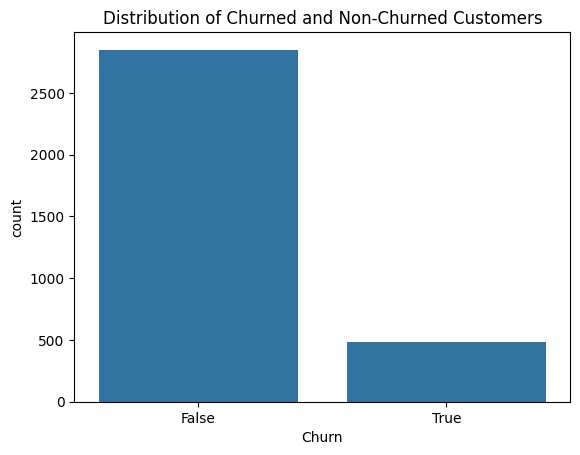

In [29]:
# Distribution of the target variable (Churn)
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churned and Non-Churned Customers')
plt.show()



#### Characteristics of Churned Customers


In [30]:
churned = df[df['Churn'] == True]
print("\nCharacteristics of Churned Customers:")
print(churned.describe())


Characteristics of Churned Customers:
       Account length   Area code  Number vmail messages  Total day minutes  \
count      483.000000  483.000000             483.000000         483.000000   
mean       102.664596  437.817805               5.115942         206.914079   
std         39.467820   42.792270              11.860138          68.997792   
min          1.000000  408.000000               0.000000           0.000000   
25%         76.000000  408.000000               0.000000         153.250000   
50%        103.000000  415.000000               0.000000         217.600000   
75%        127.000000  510.000000               0.000000         265.950000   
max        225.000000  510.000000              48.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count       483.000000        483.000000         483.000000       483.000000   
mean        101.335404         35.175921         212.410145       100.561077   
std      



#### Characteristics of Non-Churned Customers


In [ ]:
not_churned = df[df['Churn'] == False]
print("\nCharacteristics of Non-Churned Customers:")
print(not_churned.describe())



#### Analysis of Categorical Features




### 3. Which ML modeling can be implemented and represent model results? including features input and explaining features important.

#### Data Preprocessing


In [ ]:
# Data preprocessing
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)



#### Split the Data into Training and Testing Sets


In [ ]:
# Split the data into training and testing sets
X = df.drop(['State', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Standardize the Features


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



#### Train a Logistic Regression Model


In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



#### Predict and Evaluate the Model


In [ ]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



#### Feature Importance


In [ ]:
# Feature importance
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)



### 4. What actions regarding qualitative and quantitative analytics could be implemented to enhance retention rate?

#### Actions to Enhance Retention Rate


In [ ]:
# Actions to enhance retention rate:
# 1. Qualitative Analytics: Conduct customer surveys and feedback sessions to understand the reasons behind churn.
#    Use this information to improve customer service and address pain points.
# 2. Quantitative Analytics: Analyze customer usage patterns and identify early warning signs of churn.
#    Implement targeted marketing campaigns and personalized offers to retain at-risk customers.



Bạn có thể sao chép và dán từng đoạn mã vào các ô riêng biệt trong Jupyter Notebook để thực hiện từng bước một cách rõ ràng và có tổ chức.